# [Chapter 6](https://github.com/Ziaeemehr/spikes/blob/main/docs/examples/chap_06.ipynb)

#### **Nonlinear neurodynamics and bifurcations**

Code by : Abolfazl Ziaeemehr 
- https://github.com/Ziaeemehr

<a href="https://colab.research.google.com/github/Ziaeemehr/spikes/blob/main/docs/examples/chap_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# uncomment and run this line to install the package on colab
# !pip install "git+https://github.com/Ziaeemehr/spikes.git" -q

In [2]:
import sympy
import sympy as sp
import numpy as np
import matplotlib as mpl
from scipy.linalg import eig
import matplotlib.pyplot as plt
from IPython.display import display, Math
from spikes.solver import solve_system_of_equations

sympy.init_printing()

In [3]:

LABELSIZE = 13
plt.rc('axes', labelsize=LABELSIZE)
plt.rc('axes', titlesize=LABELSIZE)
plt.rc('figure', titlesize=LABELSIZE)
plt.rc('legend', fontsize=LABELSIZE)
plt.rc('xtick', labelsize=LABELSIZE)
plt.rc('ytick', labelsize=LABELSIZE)
mpl.rcParams['image.cmap'] = 'jet'

To plot the nullclines of a two-dimensional system of differential equations, you can use Python along with libraries like `NumPy`, `Matplotlib`, and `SymPy`. Here's a brief overview of how to do it:

#### Step 1: Define the System of Differential Equations

A two-dimensional system of differential equations can be written as:

$$
\begin{cases}
\frac{dx}{dt} = f(x, y) \\
\frac{dy}{dt} = g(x, y)
\end{cases}
$$

#### Step 2: Find the Nullclines

- **Nullcline for $ \frac{dx}{dt} = 0 $**: Set $ f(x, y) = 0 $.
- **Nullcline for $ \frac{dy}{dt} = 0 $**: Set $ g(x, y) = 0 $.

#### Step 3: Use SymPy to Solve for Nullclines

You can use `SymPy` to symbolically solve for $ y $ in terms of $x$ (or vice versa) where these equations are zero.

#### Step 4: Plot the Nullclines Using Matplotlib

After finding the expressions for the nullclines, you can use `Matplotlib` to plot them over a grid of values for $ x $ and $ y $.

#### Example

Consider the following system of differential equations:

$$
\begin{cases}
\frac{dx}{dt} = x^2 - y \\
\frac{dy}{dt} = y - x
\end{cases}
$$

#### Explanation

1. **Defining the system**: The functions $ f(x, y) $ and $ g(x, y) $ represent the right-hand side of the system of differential equations.

2. **Finding nullclines**: We solve $ f(x, y) = 0 $ and $ g(x, y) = 0 $ for $ y $.

3. **Plotting**: The nullclines are plotted using `Matplotlib`, with one set for $ \frac{dx}{dt} = 0 $ and another for $ \frac{dy}{dt} = 0 $.

#### Tools Used

- **SymPy**: For symbolic computation, solving the equations for nullclines.
- **NumPy**: For numerical operations and creating arrays of values.
- **Matplotlib**: For plotting the nullclines on a 2D plane.

This approach helps visualize where the system's derivatives are zero, giving insight into the system's behavior, such as identifying equilibrium points and possible phase portrait structures.

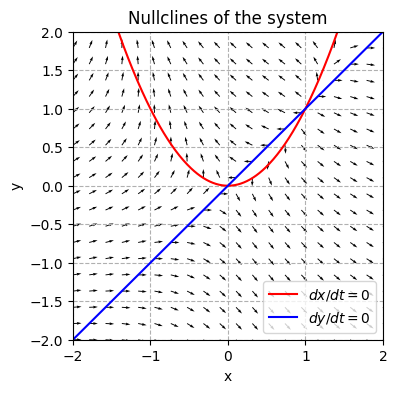

In [9]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from spikes.plot import plot_nullclines
from spikes.plot import plot_direction_field


# Example usage:
x, y = sp.symbols('x y')
f = x**2 - y
g = y - x

ax = plot_nullclines(f, g, symbols=['x', 'y']);


# if we want to add direction fields 
def f(x, y):
    return x**2 - y

def g(x, y):
    return y - x

num_points = 20
x = np.linspace(-2, 2, num_points)
y = np.linspace(-2, 2, num_points)
X, Y = np.meshgrid(x, y)

u = f(X, Y)
v = g(X, Y)

norm = np.sqrt(u**2 + v**2)
u_norm = u / norm
v_norm = v / norm
ax.quiver(X, Y, u_norm, v_norm);


Equation 6.3

$$
\begin{align*}
\frac{dA}{dt} &= \frac{1}{\tau_A}\big( -A + 2B \big) \\
\frac{dB}{dt} &= \frac{1}{\tau_B}\big( -B + \frac{L}{1+A} \big) \\
\end{align*}
$$

<lambdifygenerated-23>:2: RuntimeWarning: divide by zero encountered in divide
  return (10 - B)/B


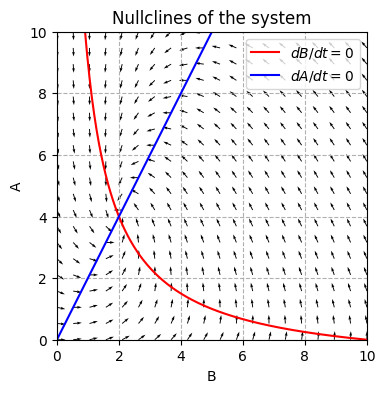

In [13]:
A, B = sp.symbols('A B')

L = 10
f = -A + 2 * B
g = -B + L / (A+1)

ax = plot_nullclines(g, f, symbols=['B', 'A'], x_range=(0,10), y_range=(0,10));

# adding direction fields
def f(A, B):
    return -A + 2 * B

def g(A, B):
    return -B + L / (A+1)

num_points = 20
x = np.linspace(0, 10, num_points)
y = np.linspace(0, 10, num_points)
X, Y = np.meshgrid(x, y)

u = f(X, Y)
v = g(X, Y)

norm = np.sqrt(u**2 + v**2)
u_norm = u / norm
v_norm = v / norm
ax.quiver(Y, X, v_norm, u_norm);